<a href="https://colab.research.google.com/github/HardikZala/Data-Analysis/blob/main/Portfolio_Risk_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Web scrape yahoo finance, based on stock ticker that the user enters
# create portfolio with all the stock information, and portfolio weights
# calculate and generate dashboard to display portfolio risk
# BONUS: compare portfolios to other portfolios with similar risk and returns
# BONUS: ADD crypto into the portfolio: CHALLANGE: cryoti trades 7 days a week, stock markets trade 5 days a week:
  #possible solution: make stock null values friday close value: possibly change trading days to 365 from 252(yearly trading days) 

In [ ]:
!pip install bs4
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 30.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

In [ ]:
#Populate portfolio with stocks 
print('enter stock ticker')
print('press q to quit')
stocks_list = set()
weight = np.array([])
companies = {}
while True:                               #While Loop to get user's stock Tickers
    stock = str.upper(input())
    if str.upper(stock) == 'Q':
        break
    stocks_list.add(stock)             # store input in stocks_list 

for stock in stocks_list:                 # for loop to call yfinance api to get stock closing prices
  prices = yf.Ticker(stock)
  prices = prices.history(period ='5y')
  companies[stock] = prices                     
  companies[stock] = companies[stock]['Close']  # added a companies dictionary to get stock name and price

portfolio = pd.concat(companies, axis = 1)  # concat all the stock prices into one data frame called portfolio
portfolio

enter stock ticker
press q to quit
amzn
googl
aapl
pfe
q


,GOOGL,AMZN,AAPL,PFE
Date,,,,
2017-06-22,976.619995,50.064999,34.465744,26.870838
2017-06-23,986.090027,50.187000,34.619583,26.957617
2017-06-26,972.090027,49.699001,34.510704,26.855059
2017-06-27,948.090027,48.839001,34.016068,26.642046
2017-06-28,961.010010,49.516499,34.513081,26.626272
...,...,...,...,...
2022-06-15,2195.290039,107.669998,135.429993,48.509998
2022-06-16,2120.669922,103.660004,130.059998,47.480000
2022-06-17,2142.870117,106.220001,131.559998,46.529999


In [ ]:
# Get user input for portfolio weights
initial_weight = {} 
keys = portfolio.shape[1]
weight_list = []
x = list(stocks_list)

for i in range(keys):
    print('For stock:',x[i]) 
    weight = float(input('enter 0.XXXX format portfolio weights:'))
    if i <= keys:
      weight_list.append(weight)
      k = x[i]
      initial_weight[k] = weight_list[i]
    else:
      break 

For stock: GOOGL
enter 0.XXXX format portfolio weights:0.25
For stock: AMZN
enter 0.XXXX format portfolio weights:0.25
For stock: AAPL
enter 0.XXXX format portfolio weights:0.25
For stock: PFE
enter 0.XXXX format portfolio weights:0.25


In [ ]:
initial_weight

{'AAPL': 0.25, 'AMZN': 0.25, 'GOOGL': 0.25, 'PFE': 0.25}

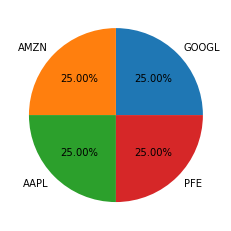

In [ ]:
import matplotlib.pyplot as plt

labels = list(initial_weight.keys())
values = list(initial_weight.values())

plt.pie(values,labels = labels, autopct='%1.2f%%')
plt.show()

In [ ]:
portfolio

,GOOGL,AMZN,AAPL,PFE
Date,,,,
2017-06-22,976.619995,50.064999,34.465744,26.870838
2017-06-23,986.090027,50.187000,34.619583,26.957617
2017-06-26,972.090027,49.699001,34.510704,26.855059
2017-06-27,948.090027,48.839001,34.016068,26.642046
2017-06-28,961.010010,49.516499,34.513081,26.626272
...,...,...,...,...
2022-06-15,2195.290039,107.669998,135.429993,48.509998
2022-06-16,2120.669922,103.660004,130.059998,47.480000
2022-06-17,2142.870117,106.220001,131.559998,46.529999


In [ ]:
portfolio.describe()

,GOOGL,AMZN,AAPL,PFE
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,1600.068109,113.403181,85.318657,35.624329
std,634.993668,40.949580,46.011111,7.295802
min,919.460022,46.930000,33.779411,24.853760
25%,1113.474976,83.525002,44.614397,30.179562
50%,1285.500000,96.320999,64.971397,34.032368
75%,2091.930054,158.086998,128.051884,37.108797
max,2996.770020,186.570496,181.511703,60.296108


**COVARIANCE MATRIX**

In [ ]:
# Calculate log returns
log_returns = np.log(portfolio).diff().dropna()
log_returns

,GOOGL,AMZN,AAPL,PFE
Date,,,,
2017-06-23,0.009650,0.002434,0.004454,0.003224
2017-06-26,-0.014299,-0.009771,-0.003150,-0.003812
2017-06-27,-0.024999,-0.017456,-0.014437,-0.007964
2017-06-28,0.013535,0.013777,0.014505,-0.000592
2017-06-29,-0.024427,-0.014647,-0.014853,-0.003562
...,...,...,...,...
2022-06-15,0.028171,0.051064,0.019912,0.012237
2022-06-16,-0.034582,-0.037955,-0.040459,-0.021461
2022-06-17,0.010414,0.024396,0.011467,-0.020211


In [ ]:
# Calculate covariance matrix
cov_matrix = log_returns.cov()
cov_matrix

,GOOGL,AMZN,AAPL,PFE
GOOGL,0.000338,0.000260,0.000255,0.000101
AMZN,0.000260,0.000442,0.000272,0.000079
AAPL,0.000255,0.000272,0.000407,0.000108
PFE,0.000101,0.000079,0.000108,0.000253


In [ ]:
avg_returns=log_returns.mean()
avg_returns = pd.DataFrame(avg_returns)
avg_returns.columns = ['average 5 year returns']

# **ALPHA AND BETA**

In [ ]:
# alpha compares the returns to a benchmark index such as S&P 500
# positive means outperformed, negative means underperform

# beta measures volatility compared to benchmark index
# the higher the beta the more volatile your stock

In [ ]:
# Import S&P500 index(^GSPC)
m  = yf.Ticker('^GSPC')
m = m.history(period ='5y') # Market index
m = pd.DataFrame(m)
portfolio_m = pd.merge(m['Close'],portfolio, how = 'outer', on = 'Date')
portfolio_m.rename(columns = {'Close':'Index:^GSPC'}, inplace = True)
portfolio_m_log = np.log(portfolio_m).diff().dropna()

In [ ]:
portfolio_m_log

,Index:^GSPC,GOOGL,AMZN,AAPL,PFE
Date,,,,,
2017-06-23,0.001560,0.009650,0.002434,0.004454,0.003224
2017-06-26,0.000316,-0.014299,-0.009771,-0.003150,-0.003812
2017-06-27,-0.008106,-0.024999,-0.017456,-0.014437,-0.007964
2017-06-28,0.008770,0.013535,0.013777,0.014505,-0.000592
2017-06-29,-0.008637,-0.024427,-0.014647,-0.014853,-0.003562
...,...,...,...,...,...
2022-06-15,0.014487,0.028171,0.051064,0.019912,0.012237
2022-06-16,-0.033052,-0.034582,-0.037955,-0.040459,-0.021461
2022-06-17,0.002198,0.010414,0.024396,0.011467,-0.020211


In [ ]:
#get mean returns
portfolio_m_avg_return = portfolio_m_log.mean()
pd.DataFrame(portfolio_m_avg_return)
portfolio_m_avg_return.columns = ['Average Portfolio Returns']
portfolio_m_avg_return

Index:^GSPC    0.000352
GOOGL          0.000666
AMZN           0.000629
AAPL           0.001095
PFE            0.000484
dtype: float64

In [ ]:
#CAPM beta coefficient
import numpy as np
def calc_beta(df):
  np_array = df.values
  m = np_array[:,0]
  beta = [] 
  for ind, col in enumerate(df):
    if ind > 0:
      s = np_array[:,ind]
      covariance = np.cov(s,m)
      beta.append(covariance[0,1]/covariance[1,1])
  return pd.Series(beta, portfolio.columns, name = 'Beta')

In [ ]:
calc_beta(portfolio_m_log)

GOOGL    1.110036
AMZN     1.037599
AAPL     1.215918
PFE      0.619168
Name: Beta, dtype: float64

In [ ]:
# BETA USING LINEAR REGRESSION
from scipy import stats

portfolio_m = pd.merge(m['Close'],portfolio, how = 'outer', on = 'Date')
portfolio_m.rename(columns = {'Close':'Index'}, inplace = True)

def calc_reg_beta(df):
  np_array = df.values
  m = np_array[:,0]
  beta = [] 
  for ind, col in enumerate(df):
    if ind > 0:
      s = np_array[:,ind]
      beta.append(stats.linregress(m,s)[0]) # use linear regression to find beta
  return pd.Series(beta, portfolio.columns, name = 'Beta')


In [ ]:
calc_reg_beta(portfolio_m_log)

GOOGL    1.110036
AMZN     1.037599
AAPL     1.215918
PFE      0.619168
Name: Beta, dtype: float64

In [ ]:
def matrix_beta(df):
  X = df.values[:,[0]]
  X = np.concatenate([np.ones_like(X), X], axis=1)  # add column for intercept(values as 1's)
  beta = np.linalg.pinv(X.T @ X) @ X.T @ df.values[:,1:] #apply matrix algebra for linear regression closed for solution
  return pd.Series(beta[1], df.columns[1:], name='Beta')

In [ ]:
matrix_beta(portfolio_m_log)

GOOGL    1.110036
AMZN     1.037599
AAPL     1.215918
PFE      0.619168
Name: Beta, dtype: float64

In [ ]:
# Get first date of historical value
# index/string slicing

date = portfolio.index.values[0]  # get first date
date = date.astype(str)
date = date[:10]
print(date)

2017-06-22


In [ ]:
# import Risk Free Rate T-Bills 5 years

from bs4 import BeautifulSoup
import requests

html = requests.get('https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value=2017')
soup = BeautifulSoup(html.text, "html.parser")

table = soup.find('table', class_ = 'views-table views-view-table cols-19' )

for t in table.find_all('tbody'):
  rows = t.find_all('tr')
  for row in rows:
    date = row.find_all('td',class_= "views-field views-field-field-tdr-date")
    coupon = row.find_all('td',class_ = 'views-field views-field-field-br-round-b1-close-13wk-2')

tbill = date + coupon

**SCRAPE TREASURY BILL DATA**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
row_data = []
year = 2017 
while True:
  url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value='+ str(year)
  html = requests.get(url)
  soup = bs(html.text,'html.parser')
  table = soup.find('table', class_ = 'views-table views-view-table cols-19' )
    
  for row in table.find_all('tr'):
    col = row.find_all('td')
    col = [ele.text.strip() for ele in col]
    row_data.append(col)
  
  url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value='
  year = year + 1
  year = str(year)
  url = url + year
  year = int(year)

  if year == 2023:
   break

In [ ]:
# change url to get each new year. # Implimented into the web scrape cell above
# convert to string and revert to int for string addition, and adding respectively
year = 2017
for y in range(year):
  url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value='
  year = year + 1
  year = str(year)
  url = url + year
  year = int(year)
  if year == 2022:
    break

In [ ]:
# Web Scrape Headers
header = []
for i in soup.find_all('th'):
  col_name = i.text.strip().lower().replace(" ","_")
  header.append(col_name)
header

['date',
 '20_yr',
 '30_yr',
 'extrapolation_factor',
 '4_weeks_bank_discount',
 'coupon_equivalent',
 '8_weeks_bank_discount',
 'coupon_equivalent',
 '13_weeks_bank_discount',
 'coupon_equivalent',
 '26_weeks_bank_discount',
 'coupon_equivalent',
 '52_weeks_bank_discount',
 'coupon_equivalent',
 '1_mo',
 '2_mo',
 '3_mo',
 '20_yr',
 '30_yr']

**DATA NORMALIZATION/CLEANING**

In [ ]:
# We need only 5 years or 1259 rows of data
len(row_data)

1374

In [ ]:
# convert 13 week tbill rate to float type, and get only last 5 years of data
result = pd.DataFrame(row_data, columns = header)
tbill = result.iloc[-1259:,[0,9]]
tbill['coupon_equivalent'].astype(float)

115     1.03
116     1.03
117     1.02
118     0.99
119     0.96
        ... 
1369    1.81
1370    1.72
1371    1.57
1372    1.61
1373    1.69
Name: coupon_equivalent, Length: 1259, dtype: float64

In [ ]:
# find data types
tbill.dtypes

date                 object
coupon_equivalent    object
dtype: object

In [ ]:
#convert coupon_equivalent column to float
tbill['coupon_equivalent'] = tbill['coupon_equivalent'].astype(float)
tbill.dtypes

date                  object
coupon_equivalent    float64
dtype: object

In [ ]:
#avg tbill yearly
rfr_avg = tbill['coupon_equivalent'].mean()
rfr_avg = rfr_avg/100 #Current value is in percent. Need decimal
rfr_avg

0.010761323763955341

**CAPITAL ASSET PRICING MODEL**

In [ ]:
portfolio_m_avg_return

Index:^GSPC    0.000352
GOOGL          0.000666
AMZN           0.000629
AAPL           0.001095
PFE            0.000484
dtype: float64

In [ ]:
# Calculate weight of portfolio per stock average return
portfolio_m_avg_return_df = portfolio_m_avg_return.to_frame()
portfolio_m_avg_return_df = portfolio_m_avg_return_df.iloc[1:,] 

df1 = portfolio_m_avg_return_df.assign(**initial_weight).mul(portfolio_m_avg_return_df)
df1 = df1[0].sum()

In [ ]:
# Beta
beta = calc_reg_beta(portfolio_m_log)
beta

GOOGL    1.110036
AMZN     1.037599
AAPL     1.215918
PFE      0.619168
Name: Beta, dtype: float64

In [ ]:
#CAPM capital asset pricing model
rfr = rfr_avg
market_return = ((1 + portfolio_m_avg_return[0])**365) - 1
beta = calc_reg_beta(portfolio_m_log)
expected_return = rfr + beta*(market_return - rfr)
expected_return

GOOGL    0.150890
AMZN     0.141746
AAPL     0.164256
PFE      0.088924
Name: Beta, dtype: float64

**JENSEN'S ALPHA**

In [ ]:
#import libraries
import statsmodels.regression.linear_model as lm
import statsmodels.tools.tools as ct

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
portfolio_mean = portfolio.pct_change()   # Get pct change
portfolio_mean.dropna(inplace = True)
portfolio_mean = portfolio_mean.mean()    # Get avg pct change
portfolio_mean = portfolio_mean.to_frame()
weighted_return = portfolio_mean.mul(pd.Series(initial_weight), axis = 0) # get weighted returns
portfolio_ret = np.sum(weighted_return) # Get total portfolio returns
portfolio_ret

0    0.000899
dtype: float64

**PORTFOLIO STANDARD DEVIATION**

In [ ]:
p_std = portfolio.std()
p_mean = portfolio.mean() 
p_cov = p_std/p_mean
p_cov

GOOGL    0.396854
AMZN     0.361097
AAPL     0.539285
PFE      0.204798
dtype: float64

**R-SQUARED MODEL**

measures how the stock moves in accordance with the index(in this case S&P500).
if R-SQUARE > 0.85 the stock moves proportionally to the index
if R-SQUARE < 0.85 the stock doesn't move proportionally to the index



In [ ]:
from sklearn.metrics import r2_score

In [ ]:
s_list = list(stocks_list)

In [ ]:
index_r2 = np.array(portfolio_m_log['Index:^GSPC']).reshape(-1,1)
col_len = len(portfolio_m_log.columns) -1 
for i in (n+1 for n in range(col_len)):
  print(s_list[i-1])
  stock_r2 = np.array(portfolio_m_log.iloc[:,i].values)
  r_square = r2_score(stock_r2,index_r2)
  print(r_square)

GOOGL
0.6167636242697512
AMZN
0.41498867189255206
AAPL
0.5993588179210234
PFE
0.16102294977464737


**SHARPE RATIO**

In [ ]:
for i in range(len(log_returns.columns)):
    print(s_list[i])
    std_i = log_returns.iloc[:,i].values.std()*np.sqrt(252)
    cumulative_i = ((portfolio.iloc[-1,i] / portfolio.iloc[0,i])**(1/5)) - 1
    sharpe_i = (cumulative_i - rfr) / std_i
    print(sharpe_i)

GOOGL
0.5891700576239821
AMZN
0.4816430465890627
AAPL
0.9568914393034844
PFE
0.4707365246363684


**Efficient Frontiers**

In [ ]:
# Values for each individual stock
from numpy.ma.core import var
mean = pd.DataFrame(log_returns.mean())
var = pd.DataFrame(np.var(log_returns))
std = pd.DataFrame(log_returns.std())
cov = log_returns.cov()
corr = log_returns.corr(method='pearson')

In [ ]:
# Values for total portfolio
weighted_return = portfolio_mean.mul(pd.Series(initial_weight), axis = 0) # get weighted returns
w_mean = mean = pd.DataFrame(weighted_return.mean())
w_var = np.var(weighted_return)
w_std = var*np.sqrt(252)

In [ ]:
#Total Portfolio Returns
weighted_total_returns = np.dot(log_returns.mean(),pd.Series(weight_list))
cov = log_returns.cov()

In [ ]:
def portfolioreturn(weights):
  return np.dot(log_returns.mean(),weights)

In [ ]:
def weightscreator(df):
  rand = np.random.random(len(log_returns.columns))
  rand /= rand.sum()
  return rand

In [ ]:
weightscreator(log_returns)

array([0.37508182, 0.34395007, 0.1132171 , 0.16775101])

In [ ]:
def portfoliostd(weights):
  return(np.dot(np.dot(log_returns.cov(),weights),weights))**(1/2)*np.sqrt(252)

In [ ]:
portfoliostd(weight_list)

0.23775386153210631

In [ ]:
returns = []
stds = []
w = []
p_sharpe = []
for i in range(1000):
  weights = weightscreator(log_returns)
  returns.append(portfolioreturn(weights))
  stds.append(portfoliostd(weights))
  w.append(weights)
  p_sharpe.append(portfolioreturn(weights)/portfoliostd(weights))

In [ ]:
np_sharpe = np.array(p_sharpe)
np_sharpe

In [ ]:
max_index = np_sharpe.argmax()
max_index

In [ ]:
returns[stds.index(min(stds))]

0.000572329371267714

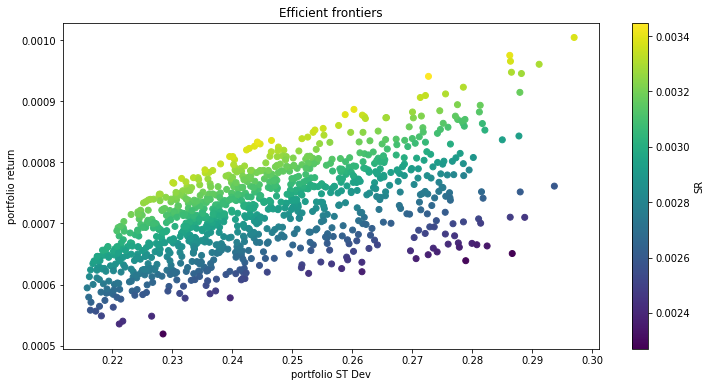

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(stds,returns,c = p_sharpe)
plt.title("Efficient frontiers")
plt.xlabel("portfolio ST Dev")
plt.ylabel("portfolio return")
plt.colorbar(label='SR')
plt.show()

In [ ]:
#Value at Risk

In [ ]:
#The Bottom Line

In [ ]:
# MONTE CARLO SIMULATION